# Proyek Analisis Data: Bike Sharing
- Nama: Rifqi Asverian Putra
- Email: rifqiasverian16@gmail.com
- Id Dicoding: asvrn16

## Menentukan Pertanyaan Bisnis

- Bagaimana hasil penyewaan sepeda pada tahun 2011-2012?
- Apakah cuaca berpengaruh dengan penyewaan sepeda? Bagaimana bisa?
- Apakah ada jam khusus dimana penyewaan sepeda mengalami peningkatan?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Mengimport dataset Day

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = "drive/My Drive/Colab Notebooks/dataset/day.csv"
day = pd.read_csv(data)

Mounted at /content/drive


Menampilkan dataset Days

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengimport dataset Hour

In [4]:
filepath = "drive/My Drive/Colab Notebooks/dataset/hour.csv"
hour = pd.read_csv(filepath)

Menampilkan dataset Hour

In [5]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menampilkan info dataset Day, disini terlihat bahwa tipe data dari dteday berupa object, yang seharusnya bertipe datetime

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Menampilkan descriptive statistic dari dataset Day untuk melihat apakah terdapat keanehan pada nilainya

In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak terdapat data duplikat pada dataset Day

In [8]:
day.duplicated().sum()

0

Mengecek apakah terdapat data yang kosong

In [9]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Menampilkan info dari dataset Hour dan disini juga terlihat bahwa dteday memiliki tipe data yang tidak tepat

In [10]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Menampilkan descriptive statistic dari dataset Hour

In [11]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat duplikasi data pada dataset Hour

In [12]:
hour.duplicated().sum()

0

Mengecek apakah terdapat data yang kosong

In [13]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

Mengubah tipe data dteday menjadi datetime

In [14]:
day['dteday']=pd.to_datetime(day['dteday'])
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengubah tipe data dteday menjadi datetime

In [15]:
hour['dteday']=pd.to_datetime(hour['dteday'])
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

Melihat statistik deskriptif dari dataset Days

In [16]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menggunakan heatmap correlation untuk melihat korelasi antar variabel. Dari sini kita bisa mendapat gambaran jawaban dari pertanyaan yang telah dibuat. Bisa dilihat bahwa makin gelap suatu warna, maka semakin tinggi korelasinya. Seperti korelasi antara temp dan atemp. Selain itu, juga terdapat korelasi yang cukup tinggi pada kolom cnt (casual & registed) dengan kolom temp dan atemp yangm menunjukkan bahwa temperatur berpengaruh cukup tinggi. Sedangkan cuaca terlihat tidak terlalu berpengaruh (moderat) dibandingkan dengan temp

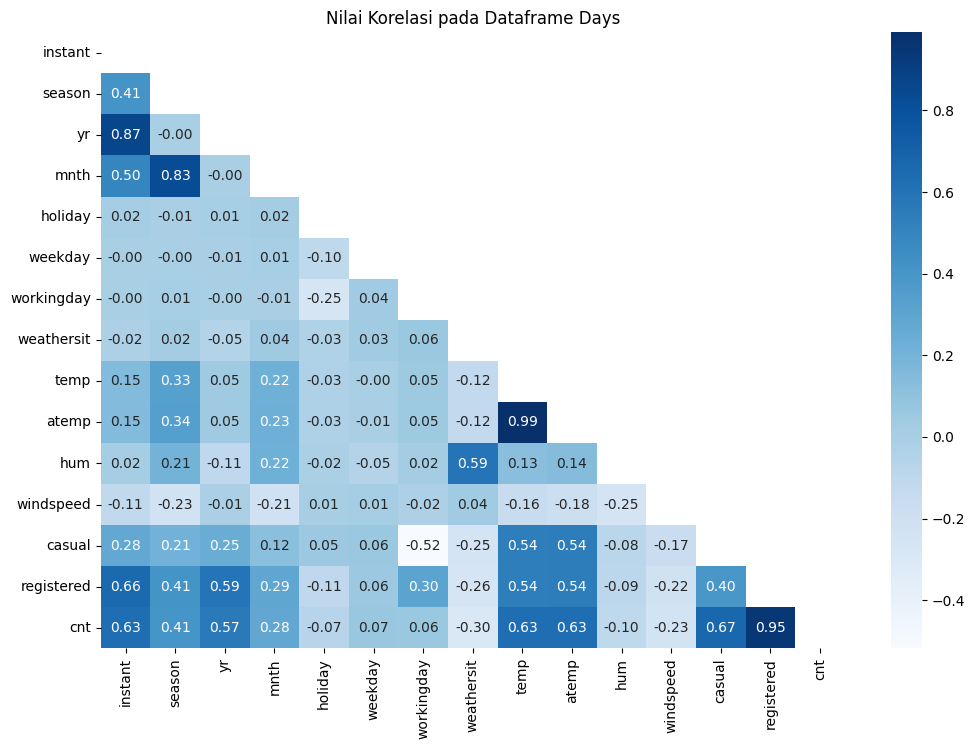

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
correlation_matrix = day.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="Blues",
    fmt=".2f")
plt.title("Nilai Korelasi pada Dataframe Days")
plt.show()

Mengelompokkan data Count berdasarkan bulan dan menghitung beberapa nilai statistiknya

In [18]:
result = day.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
result_bymnth = result.sort_values(('cnt','mean' ), ascending=False)
print(result_bymnth)

       cnt                           
       max   min         mean     sum
mnth                                 
6     8120  3767  5772.366667  346342
9     8714  1842  5766.516667  345991
8     7865  1115  5664.419355  351194
7     8173  3285  5563.677419  344948
5     8294  2633  5349.774194  331686
10    8156    22  5199.225806  322352
4     7460   795  4484.900000  269094
11    6852  1495  4247.183333  254831
3     8362   605  3692.258065  228920
12    6606   441  3403.806452  211036
2     5062  1005  2655.298246  151352
1     4521   431  2176.338710  134933


Mengelompokkan data Count berdasarkan cuaca dan menghitung beberapa nilai statistiknya

In [19]:
result = day.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
result_byweather = result.sort_values(('cnt','mean' ), ascending=False)
print(result_byweather)

             cnt                           
             max  min         mean      sum
weathersit                                 
1           8714  431  4876.786177  2257952
2           8362  605  4035.862348   996858
3           4639   22  1803.285714    37869


Melihat statistik deskriptif dari dataset Hour

In [20]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Melihat korelasi antar variavel menggunakan heatmap correlation

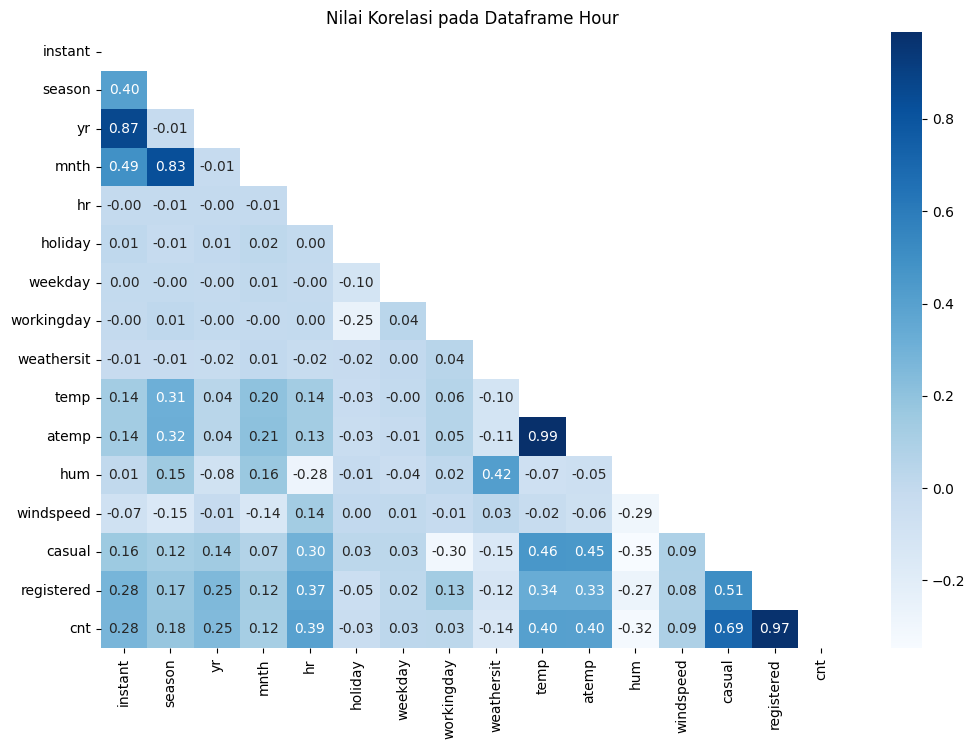

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
correlation_matrix = hour.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="Blues",
    fmt=".2f")
plt.title("Nilai Korelasi pada Dataframe Hour")
plt.show()

Mengelompokkan data Count berdasarkan jam dan menghitung beberapa nilai statistiknya

In [22]:
result = hour.groupby(by='hr').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
result_byhr = result.sort_values(('cnt','mean' ), ascending=False)
print(result_byhr)

    cnt                        
    max min        mean     sum
hr                             
17  976  15  461.452055  336860
18  977  23  425.510989  309772
8   839   5  359.011004  261001
16  783  11  311.983562  227748
19  743  11  311.523352  226789
13  760  11  253.661180  184919
12  776   3  253.315934  184414
15  750   7  251.233196  183149
14  750  12  240.949246  175652
20  567  11  226.030220  164550
9   426  14  219.309491  159438
7   596   1  212.064649  154171
11  663  10  208.143054  151320
10  539   8  173.668501  126257
21  584   6  172.314560  125445
22  502   9  131.335165   95612
23  256   2   87.831044   63941
6   213   1   76.044138   55132
0   283   2   53.898072   39130
1   168   1   33.375691   24164
2   132   1   22.869930   16352
5    66   1   19.889819   14261
3    79   1   11.727403    8174
4    28   1    6.352941    4428


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hasil penyewaan sepeda pada tahun 2011-2012?

<Figure size 1000x600 with 0 Axes>

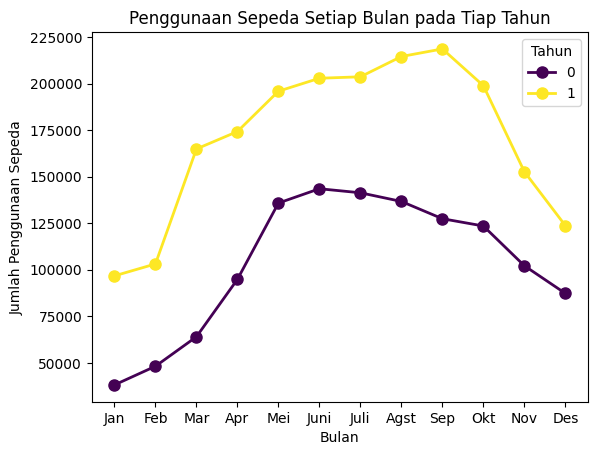

In [23]:
plt.figure(figsize=(10, 6))

month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agst', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'
}
day['bulan'] = day['mnth'].map(month_mapping)

day['bulan'] = pd.Categorical(day['bulan'], categories=month_mapping.values(), ordered=True)

grouped_data = day.groupby(['yr', 'bulan']).sum(numeric_only=True)['cnt'].unstack()

grouped_data.T.plot(kind='line', marker='o', linewidth=2, markersize=8, colormap='viridis')

plt.title('Penggunaan Sepeda Setiap Bulan pada Tiap Tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.legend(title='Tahun', bbox_to_anchor=(1, 1))

plt.xticks(range(len(grouped_data.columns)), grouped_data.columns)

legend_labels = {0: '2011', 1: '2012'}

plt.legend(title='Tahun', bbox_to_anchor=(1, 1))

plt.show()

Hasilnya adalah bahwa penyewaan pada tahun 1 (2012) lebih tinggi dibandingkan dengan tahun 0 (2011). Pada tahun 2011, puncak tertinggi penyewaan terjadi pada bulan Juni sedangkan pada tahun 2012, puncak penyewaan tertinggi terjadi pada bulan September

### Pertanyaan 2: Apakah cuaca berpengaruh dengan penyewaan sepeda? Bagaimana bisa?

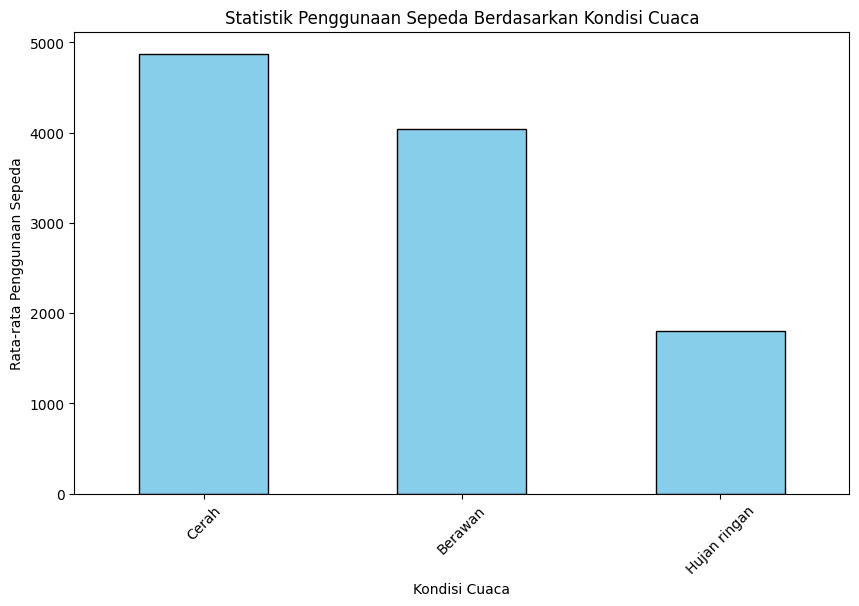

In [24]:
plt.figure(figsize=(10, 6))
result_byweather['cnt']['mean'].plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Statistik Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penggunaan Sepeda')

plt.xticks(range(len(result_byweather.index)), ['Cerah', 'Berawan', 'Hujan ringan'], rotation=45)

plt.show()

Pada heatmap correlation didapatkan bahwa sebenarnya cuaca tidak begitu berpengaruh terhadap penyewaan (moderat), kecuali pada kondisi hujan lebat disertai petir dan badai (4), tidak terdapat catatan penyewaan pada kondisi cuaca tersebut. Pada data dapat diketahui bahwa kebanyakan pelanggan menyewakan sepeda pada kondisi cuaca yang relatif cerah dan berawan, beberapa diantaranya masih menyewakan sepeda pada kondisi hujan ringan

### Pertanyaan 3: Apakah ada jam khusus dimana penyewaan sepeda mengalami peningkatan?

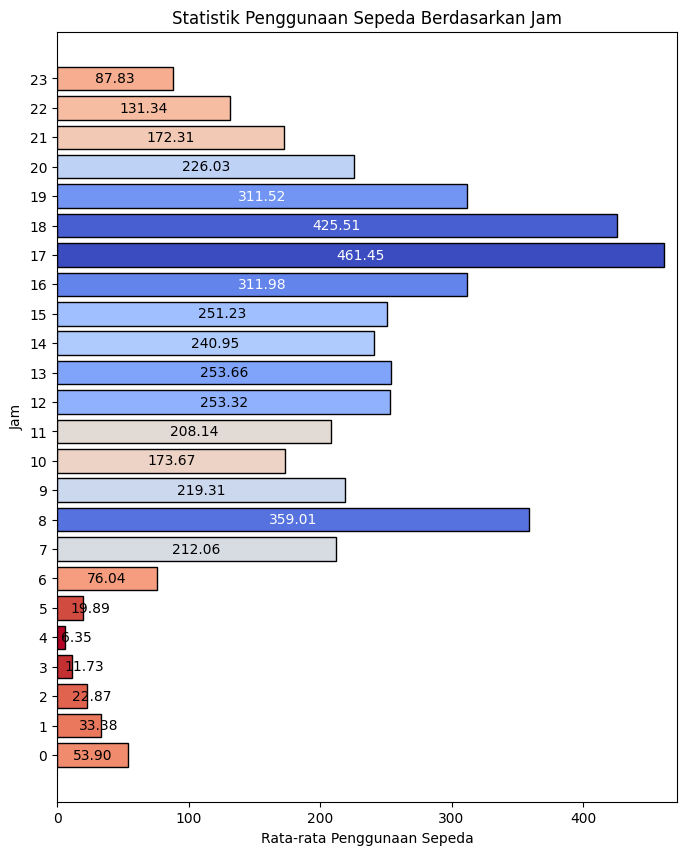

In [25]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(result_byhr)))

plt.figure(figsize=(8, 10))
bars = plt.barh(result_byhr.index, result_byhr['cnt']['mean'], color=colors, edgecolor='black')

plt.title('Statistik Penggunaan Sepeda Berdasarkan Jam')
plt.ylabel('Jam')
plt.xlabel('Rata-rata Penggunaan Sepeda')

for bar in bars:
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.2f}',
    ha='center' if width > 50 else 'left',
    va='center',
    color='white' if width > 300 else 'black')

plt.xlim(0, max(result_byhr['cnt']['mean']) + 10)

plt.yticks(result_byhr.index)

plt.show()

Penyewaan mengalami kenaikan pada sore hari dimulai dari pukul 16.00, hingga puncaknya pada pukul 17.00. Selain itu, pada pagi hari, yaitu pukul 8, juga terjadi lonjakan penyewaan sepeda.

## Conclusion

- Conclution pertanyaan 1:
Berdasarkan data, didapatkan bahwa terjadi kenaikan penyewaan dari tahun ke tahun. Ini bisa menjadi strategi bagi perusahaan agar mempersiapkan diri untuk setiap kemungkinan yang ada. Juga kita dapat mencari tau di bulan apa saja terjadi peningkatan penyewaan, agar nantinya setiap permintaan dapat ditampung dengan baik
- Conclution pertanyaan 2:
Berdasarkan data, diketahui bahwa cuaca cukup berpengaruh terhadap penyewaan sepeda. Hal ini dapat juga menjadi strategi agar perusahaan dapat mempersiapkan supply yang banyak ketika cuaca relatif cerah dan berawan karena pada saat seperti itu dimungkinkan untuk setiap aktifitas outdoor
- Conclution pertanyaan 3:
Berdasarkan data, didapatkan bahwa terdapat jam-jam yang ramai penyewaan, yaitu pada pagi hari jam 8 dan sore hari dari pukul 4 hingga 6. Hal ini bisa terjadi karena pada jam itu suhu udara sangat nyaman untuk aktifitas outdoor, sehingga terjadi kenaikan penyewaan sepeda

In [26]:
day.to_csv("all_data.csv", index=False)